In [ ]:
from manim import *

# global config
config.media_width = "50%"
config.verbosity = "WARNING"

### Config
`manim` options:
```
-v: verbosity level
-ql: medium quality
--disable_caching: disable caching
```

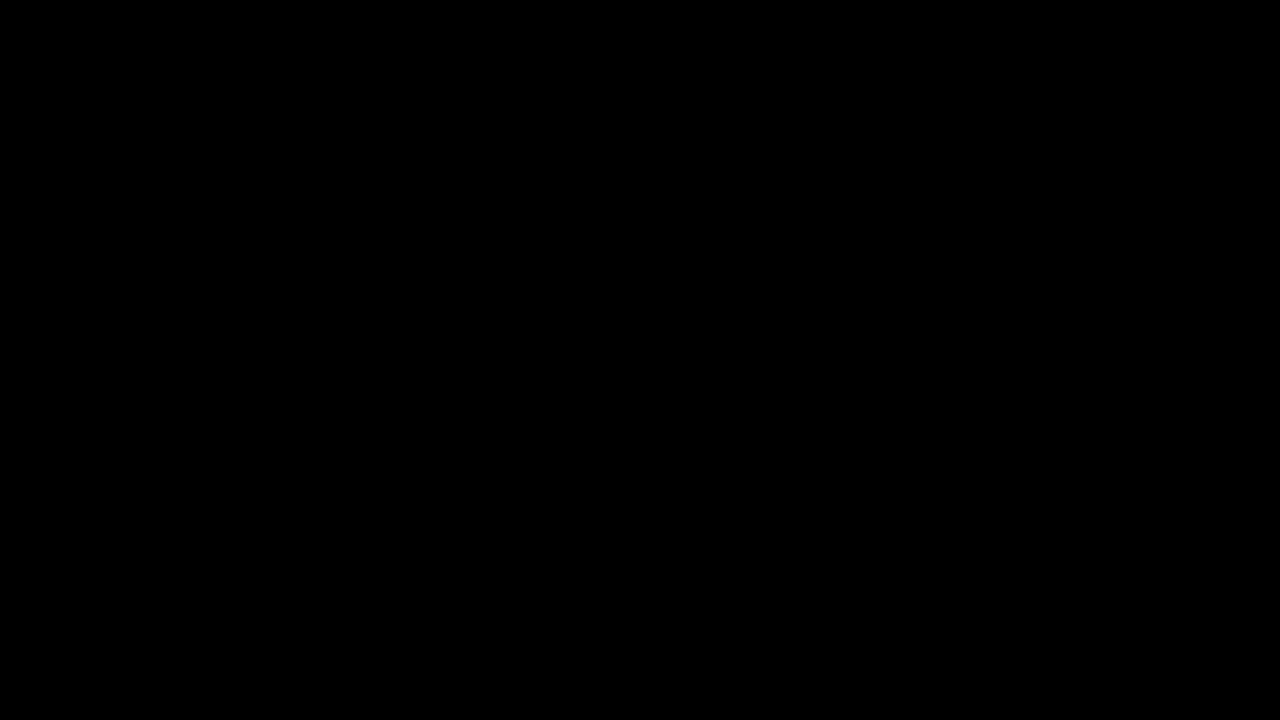

In [12]:
%%manim -v WARNING  -qm SquareToCircle 

# %%manim -v WARNING  -ql SquareToCircle

class SquareToCircle(Scene):
    def construct(self):
        circle = Circle()  # create a circle
        circle.set_fill(PINK, opacity=0.5)  # set color and transparency

        square = Square()  # create a square
        square.rotate(PI / 4)  # rotate a certain amount

        self.play(Create(square))  # animate the creation of the square
        self.play(Transform(square, circle))  # interpolate the square into the circle
        self.play(FadeOut(square))  # fade out animation
